In [148]:
# import necessary libraries
import pandas as pd
import questionary
from pathlib import Path
import fire 
import numpy as np
%matplotlib inline

In [149]:
# open csv files using read_csv function
AUDUSD_df = pd.read_csv(
            Path('../Resources/AUDUSD-2000-2020-15m.csv'),
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
EURCHF_df = pd.read_csv(
            Path('../Resources/EURCHF-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
EURJPY_df = pd.read_csv(
            Path('../Resources/EURJPY-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
EURUSD_df = pd.read_csv(
            Path('../Resources/EURUSD-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
USDCAD_df = pd.read_csv(
            Path('../Resources/USDCAD-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
USDCHF_df = pd.read_csv(
            Path('../Resources/USDCHF-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
USDJPY_df = pd.read_csv(
            Path('../Resources/USDJPY-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)


In [150]:
AUDUSD_df.drop(['HIGH', 'LOW', 'OPEN'], axis=1, inplace=True)
EURCHF_df.drop(['HIGH', 'LOW', 'OPEN'], axis=1, inplace=True)
EURJPY_df.drop(['HIGH', 'LOW', 'OPEN'], axis=1, inplace=True)
EURUSD_df.drop(['HIGH', 'LOW', 'OPEN'], axis=1, inplace=True)
USDCAD_df.drop(['HIGH', 'LOW', 'OPEN'], axis=1, inplace=True)
USDCHF_df.drop(['HIGH', 'LOW', 'OPEN'], axis=1, inplace=True)
USDJPY_df.drop(['HIGH', 'LOW', 'OPEN'], axis=1, inplace=True)

In [151]:
#Toggles for the SMA windows. Data is in 15 minutes intervals and 24 hours a day
fast_sma = 7
slow_sma = 21

AUDUSD_df['fast sma'] = AUDUSD_df['CLOSE'].rolling(window=fast_sma).mean()
AUDUSD_df['slow sma'] = AUDUSD_df['CLOSE'].rolling(window=slow_sma).mean()

EURCHF_df['fast sma'] = EURCHF_df['CLOSE'].rolling(window=fast_sma).mean()
EURCHF_df['slow sma'] = EURCHF_df['CLOSE'].rolling(window=slow_sma).mean()

EURJPY_df['fast sma'] = EURJPY_df['CLOSE'].rolling(window=fast_sma).mean()
EURJPY_df['slow sma'] = EURJPY_df['CLOSE'].rolling(window=slow_sma).mean()

EURUSD_df['fast sma'] = EURUSD_df['CLOSE'].rolling(window=fast_sma).mean()
EURUSD_df['slow sma'] = EURUSD_df['CLOSE'].rolling(window=slow_sma).mean()

USDCAD_df['fast sma'] = USDCAD_df['CLOSE'].rolling(window=fast_sma).mean()
USDCAD_df['slow sma'] = USDCAD_df['CLOSE'].rolling(window=slow_sma).mean()

USDCHF_df['fast sma'] = USDCHF_df['CLOSE'].rolling(window=fast_sma).mean()
USDCHF_df['slow sma'] = USDCHF_df['CLOSE'].rolling(window=slow_sma).mean()

USDJPY_df['fast sma'] = USDJPY_df['CLOSE'].rolling(window=fast_sma).mean()
USDJPY_df['slow sma'] = USDJPY_df['CLOSE'].rolling(window=slow_sma).mean()

In [152]:
#adds percent change and cumulative return column for the currency
AUDUSD_df['pct_change'] = AUDUSD_df['CLOSE'].pct_change()
AUDUSD_df.dropna(inplace=True)
AUDUSD_df['cum returns'] = (1 + AUDUSD_df['pct_change']).cumprod()

EURCHF_df['pct_change'] = EURCHF_df['CLOSE'].pct_change()
EURCHF_df.dropna(inplace=True)
EURCHF_df['cum returns'] = (1 + EURCHF_df['pct_change']).cumprod()

EURJPY_df['pct_change'] = EURJPY_df['CLOSE'].pct_change()
EURJPY_df.dropna(inplace=True)
EURJPY_df['cum returns'] = (1 + EURJPY_df['pct_change']).cumprod()

EURUSD_df['pct_change'] = EURUSD_df['CLOSE'].pct_change()
EURUSD_df.dropna(inplace=True)
EURUSD_df['cum returns'] = (1 + EURUSD_df['pct_change']).cumprod()

USDCAD_df['pct_change'] = USDCAD_df['CLOSE'].pct_change()
USDCAD_df.dropna(inplace=True)
USDCAD_df['cum returns'] = (1 + USDCAD_df['pct_change']).cumprod()

USDCHF_df['pct_change'] = USDCHF_df['CLOSE'].pct_change()
USDCHF_df.dropna(inplace=True)
USDCHF_df['cum returns'] = (1 + USDCHF_df['pct_change']).cumprod()

USDJPY_df['pct_change'] = USDJPY_df['CLOSE'].pct_change()
USDJPY_df.dropna(inplace=True)
USDJPY_df['cum returns'] = (1 + USDJPY_df['pct_change']).cumprod()

In [153]:
#Adds long/short column. A 1 indicates the strategy is long and a 0 is short.
AUDUSD_df['long/short'] = np.where(AUDUSD_df['fast sma'] > AUDUSD_df['slow sma'],1,0)
AUDUSD_df['strat return'] = np.where(AUDUSD_df['long/short'] == 1,AUDUSD_df['pct_change'],AUDUSD_df['pct_change'] * -1)
AUDUSD_df.dropna(inplace=True)

#calculates cumulative returns for the strategy
AUDUSD_df['cum strat returns'] = (1 + AUDUSD_df['strat return']).cumprod()

EURCHF_df['long/short'] = np.where(EURCHF_df['fast sma'] > EURCHF_df['slow sma'],1,0)
EURCHF_df['strat return'] = np.where(EURCHF_df['long/short'] == 1,EURCHF_df['pct_change'],EURCHF_df['pct_change'] * -1)
EURCHF_df.dropna(inplace=True)
EURCHF_df['cum strat returns'] = (1 + EURCHF_df['strat return']).cumprod()

EURJPY_df['long/short'] = np.where(EURJPY_df['fast sma'] > EURJPY_df['slow sma'],1,0)
EURJPY_df['strat return'] = np.where(EURJPY_df['long/short'] == 1,EURJPY_df['pct_change'],EURJPY_df['pct_change'] * -1)
EURJPY_df.dropna(inplace=True)
EURJPY_df['cum strat returns'] = (1 + EURJPY_df['strat return']).cumprod()

EURUSD_df['long/short'] = np.where(EURUSD_df['fast sma'] > EURUSD_df['slow sma'],1,0)
EURUSD_df['strat return'] = np.where(EURUSD_df['long/short'] == 1,EURUSD_df['pct_change'],EURUSD_df['pct_change'] * -1)
EURUSD_df.dropna(inplace=True)
EURUSD_df['cum strat returns'] = (1 + EURUSD_df['strat return']).cumprod()

USDCAD_df['long/short'] = np.where(USDCAD_df['fast sma'] > USDCAD_df['slow sma'],1,0)
USDCAD_df['strat return'] = np.where(USDCAD_df['long/short'] == 1,USDCAD_df['pct_change'],USDCAD_df['pct_change'] * -1)
USDCAD_df.dropna(inplace=True)
USDCAD_df['cum strat returns'] = (1 + USDCAD_df['strat return']).cumprod()

USDCHF_df['long/short'] = np.where(USDCHF_df['fast sma'] > USDCHF_df['slow sma'],1,0)
USDCHF_df['strat return'] = np.where(USDCHF_df['long/short'] == 1,USDCHF_df['pct_change'],USDCHF_df['pct_change'] * -1)
USDCHF_df.dropna(inplace=True)
USDCHF_df['cum strat returns'] = (1 + USDCHF_df['strat return']).cumprod()

USDJPY_df['long/short'] = np.where(USDJPY_df['fast sma'] > USDJPY_df['slow sma'],1,0)
USDJPY_df['strat return'] = np.where(USDJPY_df['long/short'] == 1,USDJPY_df['pct_change'],USDJPY_df['pct_change'] * -1)
USDJPY_df.dropna(inplace=True)
USDJPY_df['cum strat returns'] = (1 + USDJPY_df['strat return']).cumprod()

<AxesSubplot:xlabel='DATE_TIME'>

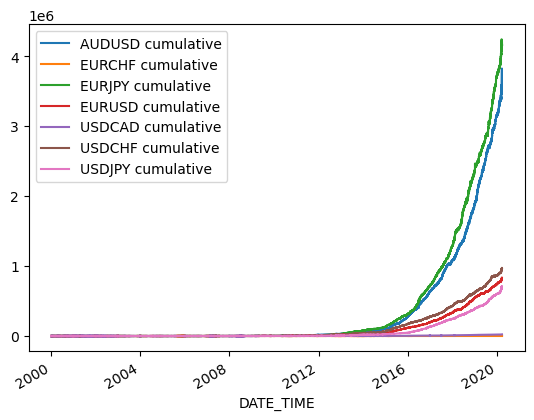

In [154]:
combined_strat_returns = pd.concat([
    AUDUSD_df['cum strat returns'],
    EURCHF_df['cum strat returns'],
    EURJPY_df['cum strat returns'],
    EURUSD_df['cum strat returns'],
    USDCAD_df['cum strat returns'],
    USDCHF_df['cum strat returns'],
    USDJPY_df['cum strat returns'],
    ], axis=1, keys=['AUDUSD cumulative','EURCHF cumulative', 'EURJPY cumulative', 'EURUSD cumulative', 'USDCAD cumulative', 'USDCHF cumulative', 'USDJPY cumulative'])
combined_strat_returns.plot()